In [1]:
#Importar as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
#importar os dados
dataset_train = pd.read_csv('B.COM.PORTUGUES_quote_chart.csv',sep =";")
training_set = dataset_train.iloc[:, 1:2].values


In [12]:
dataset_train.info

<bound method DataFrame.info of            time  B.COM.PORTUGUES
0    02/01/2019           0.2286
1    03/01/2019           0.2307
2    04/01/2019           0.2406
3    07/01/2019           0.2470
4    08/01/2019           0.2448
..          ...              ...
936  25/08/2022           0.1443
937  26/08/2022           0.1422
938  29/08/2022           0.1417
939  30/08/2022           0.1451
940  31/08/2022           0.1452

[941 rows x 2 columns]>

In [ ]:
#Transformação escala
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

In [13]:
#Estruturas de dados com 60 intervalos
X_train = []
y_train = []
for i in range(60, 941):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [14]:
X_train

array([[0.72490876, 0.73448905, 0.77965328, ..., 0.69251825, 0.69890511,
        0.68886861],
       [0.73448905, 0.77965328, 0.80885036, ..., 0.69890511, 0.68886861,
        0.72718978],
       [0.77965328, 0.80885036, 0.79881387, ..., 0.68886861, 0.72718978,
        0.7290146 ],
       ...,
       [0.5729927 , 0.58439781, 0.56843066, ..., 0.34306569, 0.34032847,
        0.33074818],
       [0.58439781, 0.56843066, 0.57208029, ..., 0.34032847, 0.33074818,
        0.32846715],
       [0.56843066, 0.57208029, 0.47125912, ..., 0.33074818, 0.32846715,
        0.3439781 ]])

In [15]:
# Ajustar Formato
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [16]:
#Importando bibliotecas do Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [46]:
#Inicializando a RNA
regressor = Sequential()
#Criando as camadas
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True, activation ="tanh"))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [47]:
#Compilando a rede
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
#Treinando
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
28/28 [==============================] - 8s 61ms/step - loss: 0.0392
Epoch 2/100
28/28 [==============================] - 2s 68ms/step - loss: 0.0104
Epoch 3/100
28/28 [==============================] - 2s 63ms/step - loss: 0.0090
Epoch 4/100
28/28 [==============================] - 2s 63ms/step - loss: 0.0081
Epoch 5/100
28/28 [==============================] - 2s 63ms/step - loss: 0.0069
Epoch 6/100
28/28 [==============================] - 2s 64ms/step - loss: 0.0055
Epoch 7/100
28/28 [==============================] - 2s 63ms/step - loss: 0.0067
Epoch 8/100
28/28 [==============================] - 2s 64ms/step - loss: 0.0065
Epoch 9/100
28/28 [==============================] - 2s 66ms/step - loss: 0.0062
Epoch 10/100
28/28 [==============================] - 2s 69ms/step - loss: 0.0053
Epoch 11/100
28/28 [==============================] - 2s 76ms/step - loss: 0.0050
Epoch 12/100
28/28 [==============================] - 2s 67ms/step - loss: 0.0047
Epoch 13/100
28/28 [=====

In [48]:
#Obtendo os dados reais
dataset_test = pd.read_csv('Prediction.csv',sep =";")
real_stock_price = dataset_test.iloc[:, 1:2].values

In [52]:
#Obtendo os dados previstos
dataset_total = pd.concat((dataset_train['B.COM.PORTUGUES'], dataset_test['B.COM.PORTUGUES']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 81):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

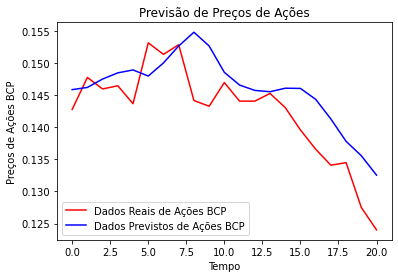

In [53]:
#Visualizando os Resultados
plt.plot(real_stock_price, color = 'red', label = 'Dados Reais de Ações BCP')
plt.plot(predicted_stock_price, color = 'blue', label = 'Dados Previstos de Ações BCP')
plt.title('Previsão de Preços de Ações')
plt.xlabel('Tempo')
plt.ylabel('Preços de Ações BCP')
plt.legend()
plt.show()

In [55]:
rmse = np.sqrt(np.mean(predicted_stock_price - real_stock_price)**2)
rmse

0.003533538304056439